### Maximum Pairwise Product

Find the maximum product of two distinct numbers in a sequence of non-negative integers. 

#### Naive Solution

Complexity O(n^2)

In [14]:
class Solution:
    @staticmethod
    def max_pair(numbers):
        if len(numbers) == 0:
            return float('nan'), float('nan')
        maximum = float('-inf')
        index1, index2 = -1, -1
        for i in range(len(numbers)):
            for j in range(i+1, len(numbers)):
                if numbers[i] * numbers[j] > maximum:
                    maximum = numbers[i] * numbers[j]
                    index1 = i
                    index2 = j
        return numbers[index1], numbers[index2]

In [23]:
%%timeit

from random import randint
Solution.max_pair([randint(1, 10000) for i in range(10000)])

8.12 ms ± 807 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Improving solution

1. Take out the max 2 O(n)

In [21]:
class Solution:
    @staticmethod
    def max_pair(numbers):
        if len(numbers) == 0:
            return float('nan'), float('nan')
        first, second = float('-inf'), float('-inf')
        for number in numbers:
            if number > first:
                second = first
                first = number
        return first, second

In [24]:
%%timeit
from random import randint
Solution.max_pair([randint(1, 10000) for i in range(100000000)])

1min 26s ± 4.54 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Writing a function that takes multiple functions and same input and plots on a graph the running times

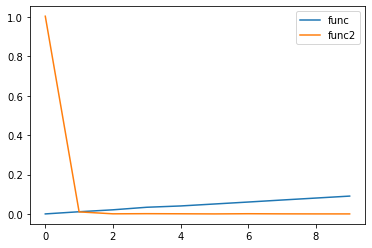

In [66]:
import matplotlib.pyplot as plt 
from time import time, sleep


def plot_time(inputs_and_sizes, *functions, outputs=None):
    """
    inputs: list of dicts of arguments
    outputs: list of outputs
    """
    xs = []
    ys_lst = [[] for i in range(len(functions))] 
    for _input in inputs_and_sizes:
        xs.append(_input.pop('size'))
        for idx, function in enumerate(functions):
            start = time()
            output = function(**_input)
            end = time()
            ys_lst[idx].append(end-start)
    for ys, function in zip(ys_lst, functions):
        plt.plot(xs, ys, label=function.__name__)
    plt.legend()

def func(x):
    sleep(0.01*x)

def func2(x):
    sleep(0.01**x)
plot_time(
        ({'x': i, 'size': i} for i in range(10)),
        func, func2
         )

### Writing a decorator that plots time for a single function

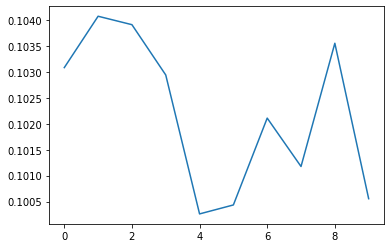

In [91]:
from functools import wraps
from time import time, sleep
import matplotlib.pyplot as plt


def plot_rt(inputs_and_sizes):
    def outer(function):
        @wraps(function)
        def inner(*args, **kwargs):
            x = []
            y = []
            for _input in inputs_and_sizes:
                x.append(_input.pop('size'))
                start = time()
                function(**_input)
                end = time()
                y.append(end-start)
            plt.plot(x, y)
        return inner
    return outer


@plot_rt({'x': i, 'size': i} for i in range(10))
def myfunc(x):
    sleep(0.1)

myfunc()